Line-level text & document metadata extraction

In [1]:
!pip -q install pdfplumber pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.6/330.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 47.2 MB/s eta 0:00:00


In [2]:
import pdfplumber
from pypdf import PdfReader

print("pdfplumber:", pdfplumber.__version__)
print("pypdf imported successfully")

pdfplumber: 0.11.9
pypdf imported successfully


In [4]:
from google.colab import files
uploaded = files.upload()

Saving table.pdf to table (1).pdf


In [5]:
pdf_path = next(iter(uploaded.keys()))
pdf_path

'table (1).pdf'

In [6]:
with pdfplumber.open(pdf_path) as pdf:
    print("Pages:", len(pdf.pages))

Pages: 1


In [7]:
with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[0]
    print("Page size:", page.width, page.height)

Page size: 612.0 792.0


In [8]:
# bbox = (x0, top, x1, bottom)
with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[0]
    bbox = (0, 110, page.width, 420)

bbox

(0, 110, 612.0, 420)

In [9]:
import pdfplumber
import pandas as pd

with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[0]
    cropped = page.crop(bbox)

    chars = cropped.chars  # list of character-level objects with metadata

print("Total chars inside bbox:", len(chars))

# Show a few raw examples
chars[:5]

Total chars inside bbox: 357


[{'matrix': (14.04, 0.0, 0.0, 14.04, 72.0, 682.8),
  'fontname': 'UJIRXF+Cambria-Bold',
  'adv': 0.578,
  'upright': True,
  'x0': 72.0,
  'y0': 679.72524,
  'x1': 80.11512,
  'y1': 693.76524,
  'width': 8.115120000000005,
  'height': 2.2747600000000148,
  'size': 14.039999999999964,
  'mcid': 0,
  'tag': 'H1',
  'object_type': 'char',
  'page_number': 1,
  'ncs': 'ICCBased',
  'text': 'E',
  'stroking_color': (0,),
  'non_stroking_color': (0.212, 0.373, 0.569),
  'top': 110,
  'bottom': 112.27476000000001,
  'doctop': 110.0},
 {'matrix': (14.04, 0.0, 0.0, 14.04, 80.15724, 682.8),
  'fontname': 'UJIRXF+Cambria-Bold',
  'adv': 0.525,
  'upright': True,
  'x0': 80.15724,
  'y0': 679.72524,
  'x1': 87.52824,
  'y1': 693.76524,
  'width': 7.370999999999995,
  'height': 2.2747600000000148,
  'size': 14.039999999999964,
  'mcid': 0,
  'tag': 'H1',
  'object_type': 'char',
  'page_number': 1,
  'ncs': 'ICCBased',
  'text': 'x',
  'stroking_color': (0,),
  'non_stroking_color': (0.212, 0.373, 

In [10]:
rows = []
for c in chars:
    rows.append({
        "text": c.get("text"),
        "fontname": c.get("fontname"),
        "size": c.get("size"),
        "x0": c.get("x0"),
        "top": c.get("top"),
        "x1": c.get("x1"),
        "bottom": c.get("bottom"),
    })

df = pd.DataFrame(rows)

# quick view
df.head(20)

,text,fontname,size,x0,top,x1,bottom
0,E,UJIRXF+Cambria-Bold,14.04,72.00000,110.00000,80.11512,112.27476
1,x,UJIRXF+Cambria-Bold,14.04,80.15724,110.00000,87.52824,112.27476
2,a,UJIRXF+Cambria-Bold,14.04,87.47208,110.00000,94.98348,112.27476
3,m,UJIRXF+Cambria-Bold,14.04,95.02560,110.00000,107.52120,112.27476
4,p,UJIRXF+Cambria-Bold,14.04,107.50716,110.00000,115.88904,112.27476
5,l,UJIRXF+Cambria-Bold,14.04,115.90308,110.00000,120.22740,112.27476
6,e,UJIRXF+Cambria-Bold,14.04,120.22740,110.00000,127.68264,112.27476
7,,UJIRXF+Cambria-Bold,14.04,127.54224,110.00000,130.63104,112.27476
8,t,UJIRXF+Cambria-Bold,14.04,130.65912,110.00000,135.78372,112.27476
9,a,UJIRXF+Cambria-Bold,14.04,135.69948,110.00000,143.21088,112.27476


In [11]:
df.groupby(["fontname", "size"]).size().reset_index(name="count").sort_values("count", ascending=False).head(20)

,fontname,size,count
1,QDKTTN+Calibri,11.04,190
0,IRJSLD+Calibri-Bold,12.00,116
2,QDKTTN+Calibri,15.96,36
4,UJIRXF+Cambria-Bold,14.04,14
3,QDKTTN+Calibri,15.96,1


In [12]:
# Extract words from the cropped region
words = cropped.extract_words(
    keep_blank_chars=False,
    use_text_flow=True,
    extra_attrs=["fontname", "size"]
)

print("Total words inside bbox:", len(words))
words[:10]

Total words inside bbox: 65


[{'text': 'Example',
  'x0': 72.0,
  'x1': 127.68263999999999,
  'top': 110,
  'doctop': 110.0,
  'bottom': 112.27476000000001,
  'upright': True,
  'height': 2.2747600000000148,
  'width': 55.68263999999999,
  'direction': 'ltr',
  'fontname': 'UJIRXF+Cambria-Bold',
  'size': 14.039999999999964},
 {'text': 'table',
  'x0': 130.65912,
  'x1': 163.31616,
  'top': 110,
  'doctop': 110.0,
  'bottom': 112.27476000000001,
  'upright': True,
  'height': 2.2747600000000148,
  'width': 32.657039999999995,
  'direction': 'ltr',
  'fontname': 'UJIRXF+Cambria-Bold',
  'size': 14.039999999999964},
 {'text': 'This',
  'x0': 72.0,
  'x1': 98.15844,
  'top': 114.69623999999999,
  'doctop': 114.69623999999999,
  'bottom': 130.6562399999999,
  'upright': True,
  'height': 15.959999999999923,
  'width': 26.15844,
  'direction': 'ltr',
  'fontname': 'QDKTTN+Calibri',
  'size': 15.959999999999923},
 {'text': 'is',
  'x0': 101.74943999999999,
  'x1': 111.70848,
  'top': 114.69623999999999,
  'doctop': 114.

In [13]:
import pandas as pd

wdf = pd.DataFrame(words)
wdf

,text,x0,x1,top,doctop,bottom,upright,height,width,direction,fontname,size
0,Example,72.00000,127.68264,110.00000,110.00000,112.27476,True,2.27476,55.68264,ltr,UJIRXF+Cambria-Bold,14.04
1,table,130.65912,163.31616,110.00000,110.00000,112.27476,True,2.27476,32.65704,ltr,UJIRXF+Cambria-Bold,14.04
2,This,72.00000,98.15844,114.69624,114.69624,130.65624,True,15.96000,26.15844,ltr,QDKTTN+Calibri,15.96
3,is,101.74944,111.70848,114.69624,114.69624,130.65624,True,15.96000,9.95904,ltr,QDKTTN+Calibri,15.96
4,an,115.29948,131.35524,114.69624,114.69624,130.65624,True,15.96000,16.05576,ltr,QDKTTN+Calibri,15.96
...,...,...,...,...,...,...,...,...,...,...,...,...
60,"95.4%,",398.29200,428.53056,320.74176,320.74176,331.78176,True,11.04000,30.23856,ltr,QDKTTN+Calibri,11.04
61,n=3,431.04768,447.80640,320.74176,320.74176,331.78176,True,11.04000,16.75872,ltr,QDKTTN+Calibri,11.04
62,1416,471.48720,493.88736,320.74176,320.74176,331.78176,True,11.04000,22.40016,ltr,QDKTTN+Calibri,11.04
63,"sec,",496.32720,513.60480,320.74176,320.74176,331.78176,True,11.04000,17.27760,ltr,QDKTTN+Calibri,11.04


In [14]:
# Round top to cluster words into the same line
wdf["line_id"] = wdf["top"].round(0)

lines = (
    wdf.sort_values(["line_id", "x0"])
      .groupby("line_id")
      .agg({
          "text": lambda x: " ".join(x),
          "fontname": lambda x: x.value_counts().index[0],
          "size": lambda x: x.value_counts().index[0],
          "x0": "min",
          "top": "min",
          "x1": "max",
          "bottom": "max",
      })
      .reset_index()
      .sort_values("top")
)

lines

,line_id,text,fontname,size,x0,top,x1,bottom
0,110.0,Example table,UJIRXF+Cambria-Bold,14.04,72.0000,110.00000,163.31616,112.27476
1,115.0,This is an example of a data table.,QDKTTN+Calibri,15.96,72.0000,114.69624,292.05648,130.65624
2,146.0,Results,IRJSLD+Calibri-Bold,12.00,448.2000,146.20800,484.18800,158.20800
3,154.0,Ballots,IRJSLD+Calibri-Bold,12.00,311.4000,153.76800,345.46800,165.76800
4,161.0,Disability Ballots,IRJSLD+Calibri-Bold,12.00,90.0000,161.08800,273.46800,173.08800
5,168.0,Participants Incomplete/,IRJSLD+Calibri-Bold,12.00,167.1600,168.40800,373.20000,180.40800
6,174.0,Accuracy Time to,IRJSLD+Calibri-Bold,12.00,400.6800,173.56800,521.25600,185.56800
7,176.0,Category Completed,IRJSLD+Calibri-Bold,12.00,90.0000,175.72800,294.08400,187.72800
8,183.0,Terminated,IRJSLD+Calibri-Bold,12.00,311.4000,183.04800,369.44400,195.04800
9,190.0,complete,IRJSLD+Calibri-Bold,12.00,478.6800,190.36800,525.63600,202.36800


In [15]:
def clamp_bbox_to_page(bbox, page):
    """
    Ensures bbox is fully inside the page bounds.
    bbox: (x0, top, x1, bottom)
    """
    x0, top, x1, bottom = bbox

    x0 = max(0, min(x0, page.width))
    x1 = max(0, min(x1, page.width))
    top = max(0, min(top, page.height))
    bottom = max(0, min(bottom, page.height))

    # Ensure proper ordering
    if x1 < x0:
        x0, x1 = x1, x0
    if bottom < top:
        top, bottom = bottom, top

    return (x0, top, x1, bottom)

def bbox_overlap(a, b):
    # a, b are (x0, top, x1, bottom)
    ax0, at, ax1, ab = a
    bx0, bt, bx1, bb = b

    inter_w = max(0, min(ax1, bx1) - max(ax0, bx0))
    inter_h = max(0, min(ab, bb) - max(at, bt))
    return inter_w > 0 and inter_h > 0

def extract_bbox_text_metadata(pdf_path, page_number, bbox):
    """
    Extract line-level metadata from text inside a bounding box.

    bbox format: (x0, top, x1, bottom) in pdfplumber coordinates
    """
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)
        cropped = page.crop(bbox)

        words = cropped.extract_words(
            keep_blank_chars=False,
            use_text_flow=True,
            extra_attrs=["fontname", "size"]
        )

        if not words:
            return {
                "page_number": page_number,
                "bbox": bbox,
                "lines": [],
                "message": "No text found inside bbox"
            }

        wdf = pd.DataFrame(words)
        wdf["line_id"] = wdf["top"].round(0)

        lines_df = (
            wdf.sort_values(["line_id", "x0"])
              .groupby("line_id")
              .agg({
                  "text": lambda x: " ".join(x),
                  "fontname": lambda x: x.value_counts().index[0],
                  "size": lambda x: x.value_counts().index[0],
                  "x0": "min",
                  "top": "min",
                  "x1": "max",
                  "bottom": "max",
              })
              .reset_index(drop=True)
              .sort_values("top")
        )

        return {
            "page_number": page_number,
            "bbox": bbox,
            "lines": lines_df.to_dict(orient="records")
        }

In [16]:
result = extract_bbox_text_metadata(pdf_path, page_number=0, bbox=bbox)
result

{'page_number': 0,
 'bbox': (0, 110, 612.0, 420),
 'lines': [{'text': 'Example table',
   'fontname': 'UJIRXF+Cambria-Bold',
   'size': 14.039999999999964,
   'x0': 72.0,
   'top': 110.0,
   'x1': 163.31616,
   'bottom': 112.27476000000001},
  {'text': 'This is an example of a data table.',
   'fontname': 'QDKTTN+Calibri',
   'size': 15.959999999999923,
   'x0': 72.0,
   'top': 114.69623999999999,
   'x1': 292.05647999999997,
   'bottom': 130.6562399999999},
  {'text': 'Results',
   'fontname': 'IRJSLD+Calibri-Bold',
   'size': 12.0,
   'x0': 448.2,
   'top': 146.20799999999997,
   'x1': 484.188,
   'bottom': 158.20799999999997},
  {'text': 'Ballots',
   'fontname': 'IRJSLD+Calibri-Bold',
   'size': 12.0,
   'x0': 311.4,
   'top': 153.76800000000003,
   'x1': 345.468,
   'bottom': 165.76800000000003},
  {'text': 'Disability Ballots',
   'fontname': 'IRJSLD+Calibri-Bold',
   'size': 12.0,
   'x0': 90.0,
   'top': 161.08799999999997,
   'x1': 273.468,
   'bottom': 173.08799999999997},
  

In [17]:
import json

print(json.dumps(result, indent=2))

{
  "page_number": 0,
  "bbox": [
    0,
    110,
    612.0,
    420
  ],
  "lines": [
    {
      "text": "Example table",
      "fontname": "UJIRXF+Cambria-Bold",
      "size": 14.039999999999964,
      "x0": 72.0,
      "top": 110.0,
      "x1": 163.31616,
      "bottom": 112.27476000000001
    },
    {
      "text": "This is an example of a data table.",
      "fontname": "QDKTTN+Calibri",
      "size": 15.959999999999923,
      "x0": 72.0,
      "top": 114.69623999999999,
      "x1": 292.05647999999997,
      "bottom": 130.6562399999999
    },
    {
      "text": "Results",
      "fontname": "IRJSLD+Calibri-Bold",
      "size": 12.0,
      "x0": 448.2,
      "top": 146.20799999999997,
      "x1": 484.188,
      "bottom": 158.20799999999997
    },
    {
      "text": "Ballots",
      "fontname": "IRJSLD+Calibri-Bold",
      "size": 12.0,
      "x0": 311.4,
      "top": 153.76800000000003,
      "x1": 345.468,
      "bottom": 165.76800000000003
    },
    {
      "text": "Disability

In [18]:
out_path = "bbox_metadata_page0.json"

with open(out_path, "w") as f:
    json.dump(result, f, indent=2)

out_path

'bbox_metadata_page0.json'

In [19]:
from pypdf import PdfReader

def extract_pdf_document_metadata(pdf_path):
    reader = PdfReader(pdf_path)
    meta = reader.metadata  # DocumentInformation

    # Convert to normal dict (and stringify values safely)
    out = {}
    if meta:
        for k, v in meta.items():
            out[str(k)] = str(v)
    return out

doc_meta = extract_pdf_document_metadata(pdf_path)
doc_meta

{'/Author': 'Mary',
 '/CreationDate': "D:20110123144232-05'00'",
 '/Creator': 'Acrobat PDFMaker 9.0 for Word',
 '/ModDate': "D:20140304212414-05'00'",
 '/Producer': 'Adobe PDF Library 9.0',
 '/SourceModified': 'D:20110123172633'}

In [20]:
combined = {
    "pdf_path": pdf_path,
    "document_metadata": doc_meta,
    "bbox_extraction": result
}

import json
print(json.dumps(combined, indent=2))

{
  "pdf_path": "table (1).pdf",
  "document_metadata": {
    "/Author": "Mary",
    "/CreationDate": "D:20110123144232-05'00'",
    "/Creator": "Acrobat PDFMaker 9.0 for Word",
    "/ModDate": "D:20140304212414-05'00'",
    "/Producer": "Adobe PDF Library 9.0",
    "/SourceModified": "D:20110123172633"
  },
  "bbox_extraction": {
    "page_number": 0,
    "bbox": [
      0,
      110,
      612.0,
      420
    ],
    "lines": [
      {
        "text": "Example table",
        "fontname": "UJIRXF+Cambria-Bold",
        "size": 14.039999999999964,
        "x0": 72.0,
        "top": 110.0,
        "x1": 163.31616,
        "bottom": 112.27476000000001
      },
      {
        "text": "This is an example of a data table.",
        "fontname": "QDKTTN+Calibri",
        "size": 15.959999999999923,
        "x0": 72.0,
        "top": 114.69623999999999,
        "x1": 292.05647999999997,
        "bottom": 130.6562399999999
      },
      {
        "text": "Results",
        "fontname": "IRJSLD

Extract image element metadata & table structure


In [21]:
def extract_bbox_image_metadata(pdf_path, page_number, bbox):
    """
    Returns embedded images that intersect bbox.
    bbox: (x0, top, x1, bottom)
    """
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)

        results = []
        for i, img in enumerate(page.images):
            img_bbox = (img["x0"], img["top"], img["x1"], img["bottom"])

            if bbox_overlap(bbox, img_bbox):
                results.append({
                    "image_id": i,
                    "image_bbox": img_bbox,
                    "width": img.get("width"),
                    "height": img.get("height"),
                    "name": img.get("name"),
                    "srcsize": img.get("srcsize"),
                })

        return {
            "page_number": page_number,
            "bbox": bbox,
            "image_count": len(results),
            "images": results
        }

In [33]:
def extract_bbox_table_signal(pdf_path, page_number, bbox):
    """
    Structural signal ONLY.
    Determines IF a table exists and HOW it is represented.
    """
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)
        cropped = page.crop(bbox)

        raw_rects = cropped.rects
        raw_lines = cropped.lines
        words = cropped.extract_words()

        rects_count = len(raw_rects)
        lines_count = len(raw_lines)
        words_count = len(words)

        # --- representation inference ---
        if rects_count > 20:
            representation = "rect_based"
        elif lines_count > 10:
            representation = "line_based"
        elif words_count > 20:
            representation = "text_aligned"
        else:
            representation = "unknown"

        likely_table = representation != "unknown"

        return {
            "page_number": page_number,
            "bbox": bbox,

            # raw structural signals
            "raw_rects_count": rects_count,
            "raw_lines_count": lines_count,
            "words_count": words_count,
            "curves_count": len(cropped.curves),

            # decision outputs
            "likely_table": likely_table,
            "representation": representation
        }

In [34]:
def rects_to_cell_candidates(rects, min_w=5, min_h=5):
    """
    Convert raw pdfplumber rects into candidate cell regions.
    Used ONLY for rect-based tables.

    Geometry-only.
    No text.
    No grid inference.
    """
    candidates = []

    for i, r in enumerate(rects):
        # pdfplumber rects may expose width/height OR x0/x1
        x0, x1 = r["x0"], r["x1"]
        top, bottom = r["top"], r["bottom"]

        w = x1 - x0
        h = bottom - top

        # Ignore hairline borders
        if w < 2 or h < 2:
            continue

        candidates.append({
            "candidate_id": i,
            "bbox": (x0, top, x1, bottom),

            # raw geometry
            "width": w,
            "height": h,

            # confidence signal (do NOT filter yet)
            "is_strong_candidate": (w >= min_w and h >= min_h)
        })

    return candidates

In [35]:
def grid_cells_from_rects(cells, row_tol=6, col_tol=6):
    """
    Assign row and col indices to each cell using geometry only.
    Robust to merged cells and uneven spacing.
    """

    if not cells:
        return {"rows": 0, "cols": 0, "cells": []}

    # --- compute centers ---
    for c in cells:
        x0, top, x1, bottom = c["bbox"]
        c["_cx"] = (x0 + x1) / 2
        c["_cy"] = (top + bottom) / 2
        c["_w"] = x1 - x0

    # --------------------------------------------------
    # STEP 1: cluster rows (vertical grouping)
    # --------------------------------------------------
    rows = []
    for c in sorted(cells, key=lambda x: x["_cy"]):
        for r in rows:
            if abs(r[0]["_cy"] - c["_cy"]) <= row_tol:
                r.append(c)
                break
        else:
            rows.append([c])

    rows = sorted(rows, key=lambda r: r[0]["_cy"])

    # --------------------------------------------------
    # STEP 2: assign row indices
    # --------------------------------------------------
    for r_idx, row in enumerate(rows):
        for c in row:
            c["row"] = r_idx

    # --------------------------------------------------
    # STEP 3: column clustering PER ROW
    # (this is the critical fix)
    # --------------------------------------------------
    all_columns = []

    for row in rows:
        row_cols = []
        for c in sorted(row, key=lambda x: x["_cx"]):
            for col in row_cols:
                if abs(col[0]["_cx"] - c["_cx"]) <= col_tol:
                    col.append(c)
                    break
            else:
                row_cols.append([c])
        all_columns.append(row_cols)

    # --------------------------------------------------
    # STEP 4: global column alignment
    # --------------------------------------------------
    col_centers = []
    for row_cols in all_columns:
        for col in row_cols:
            cx = sum(c["_cx"] for c in col) / len(col)
            col_centers.append(cx)

    col_centers = sorted(set(col_centers))

    # map each cell to nearest global column
    for c in cells:
        c["col"] = min(
            range(len(col_centers)),
            key=lambda i: abs(col_centers[i] - c["_cx"])
        )

    # --------------------------------------------------
    # cleanup + sort
    # --------------------------------------------------
    for c in cells:
        del c["_cx"]
        del c["_cy"]
        del c["_w"]

    cells = sorted(cells, key=lambda x: (x["row"], x["col"]))

    return {
        "rows": len(rows),
        "cols": len(col_centers),
        "cells": cells
    }

In [36]:
def filter_candidate_cells(rects, min_w=20, min_h=12):
    """
    Filters pdfplumber rects into table cell candidates.
    Does NOT delete small rects — assigns confidence & shape signals.
    """

    candidates = []

    for i, r in enumerate(rects):
        w = r["x1"] - r["x0"]
        h = r["bottom"] - r["top"]

        # Reject hairline borders outright
        if w < 2 or h < 2:
            continue

        area = w * h
        aspect_ratio = w / h if h != 0 else 0

        candidate = {
            "candidate_id": i,
            "bbox": (r["x0"], r["top"], r["x1"], r["bottom"]),
            "width": w,
            "height": h,
            "area": area,

            # strength
            "is_strong_candidate": (w >= min_w and h >= min_h),

            # geometry hints (NO semantics yet)
            "is_wide": aspect_ratio > 3,      # possible header / merged cell
            "is_tall": aspect_ratio < 0.3,    # possible column span / border
            "aspect_ratio": round(aspect_ratio, 2)
        }

        candidates.append(candidate)

    return candidates

In [37]:
def extract_table_cells(pdf_path, page_number, bbox):
    """
    Build cell objects from rect geometry + text.
    Returns a list of cell dicts (no grid yet).
    """

    cells = []

    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox_clamped = clamp_bbox_to_page(bbox, page)
        cropped = page.crop(bbox_clamped)

        candidates = filter_candidate_cells(cropped.rects)

        for i, c in enumerate(candidates):

            cell_bbox = c["bbox"]

            words = cropped.crop(cell_bbox).extract_words(
                keep_blank_chars=False,
                use_text_flow=True,
                extra_attrs=["fontname", "size"]
            )

            cell_text = " ".join(w["text"] for w in words) if words else ""

            cells.append({
                "cell_id": i,

                # geometry
                "bbox": cell_bbox,
                "width": c["width"],
                "height": c["height"],
                "area": c["area"],

                # confidence & shape
                "is_strong_candidate": c["is_strong_candidate"],
                "has_text": bool(cell_text),
                "text_char_count": len(cell_text),

                # content
                "text": cell_text,
                "text_lines": words or []
            })

    return cells

In [39]:
def extract_bbox_metadata(pdf_path, page_number, bbox):
    """
    Master unified extraction.
    Coordinates text, image, and table extraction.
    Produces:
    text + images + table grid metadata
    """

    tables = []

    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)

        # -----------------------------
        # TEXT
        # -----------------------------
        text_part = extract_bbox_text_metadata(pdf_path, page_number, bbox)

        # -----------------------------
        # IMAGES
        # -----------------------------
        image_part = extract_bbox_image_metadata(pdf_path, page_number, bbox)

        # -----------------------------
        # TABLE SIGNAL
        # -----------------------------
        table_part = extract_bbox_table_signal(pdf_path, page_number, bbox)

        # -----------------------------
        # TABLE CELLS + GRID
        # -----------------------------
        if table_part["likely_table"]:
            cells = extract_table_cells(pdf_path, page_number, bbox)
            grid = grid_cells_from_rects(cells)

            tables.append({
                "table_id": 0,
                "row_count": grid["rows"],
                "col_count": grid["cols"],
                "cell_count": len(grid["cells"]),
                "grid": grid
            })

    # -----------------------------
    # FINAL OUTPUT
    # -----------------------------
    return {
        "pdf_path": pdf_path,
        "page_number": page_number,
        "bbox": bbox,

        "text": text_part.get("lines", []),
        "text_line_count": len(text_part.get("lines", [])),

        "images": image_part.get("images", []),
        "image_count": image_part.get("image_count", 0),

        "tables": tables,
        "table_signal": table_part
    }

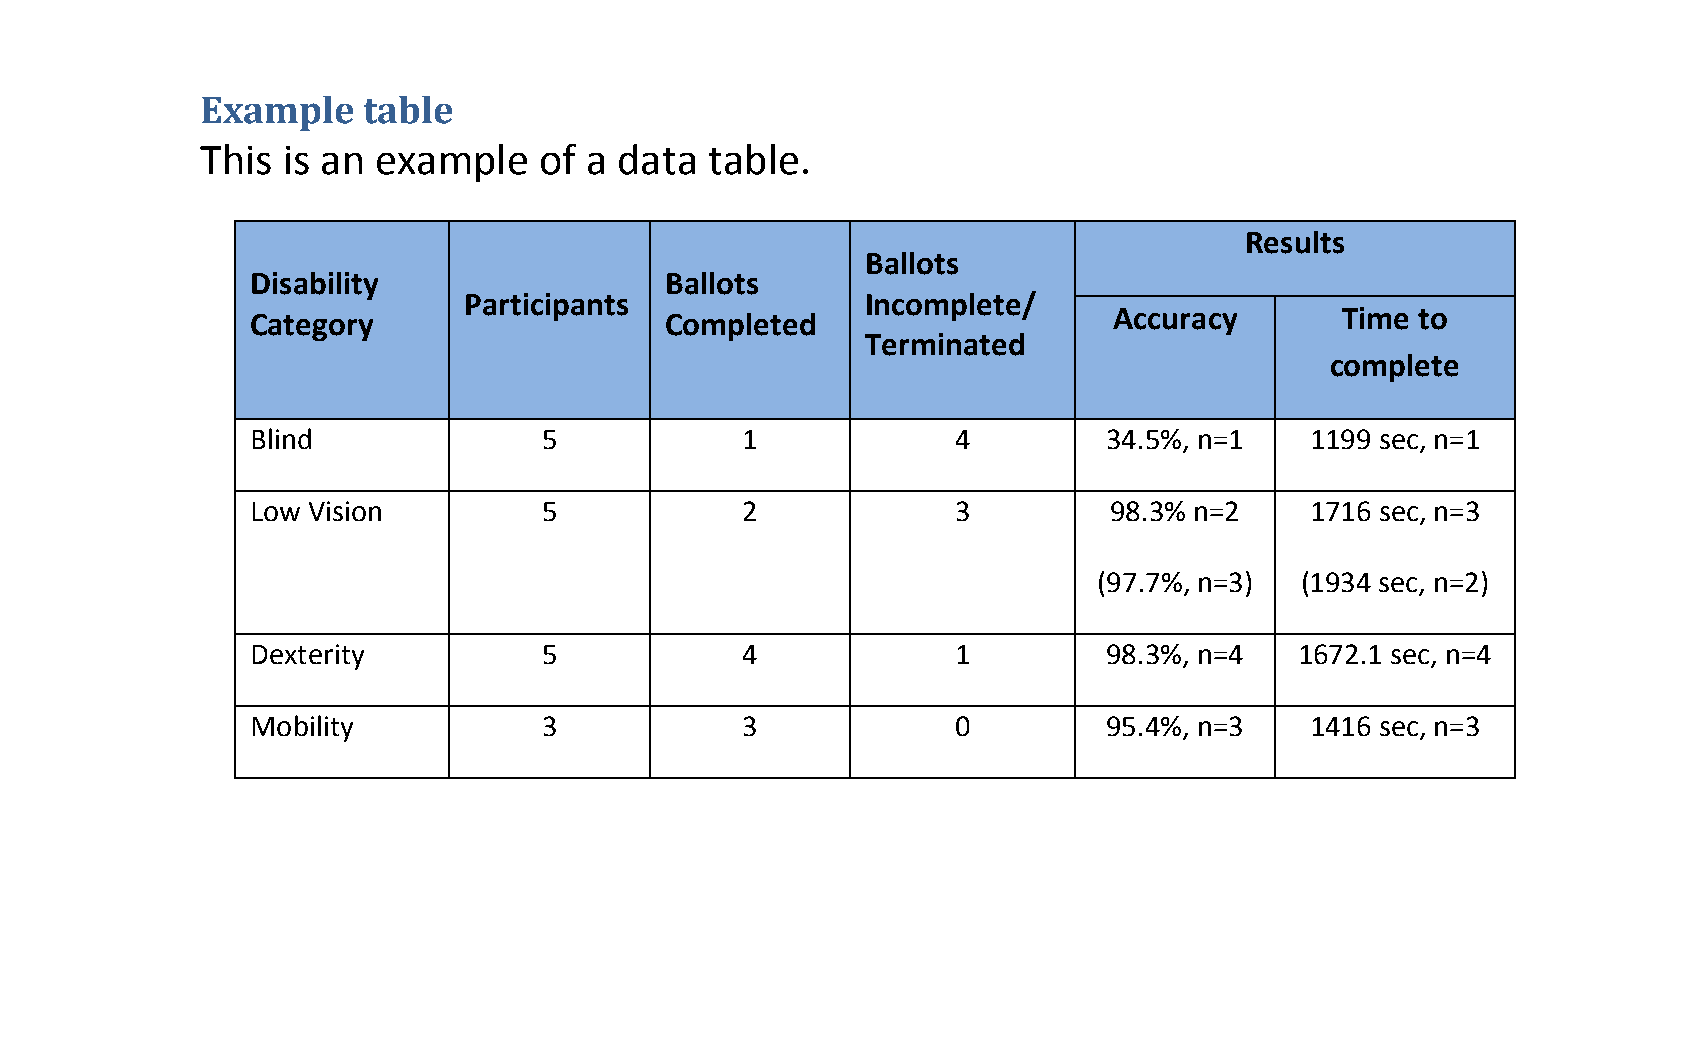

{
  "pdf_path": "table (1).pdf",
  "page_number": 0,
  "bbox": [
    0,
    65,
    612.0,
    440
  ],
  "text": [
    {
      "text": "Example table",
      "fontname": "UJIRXF+Cambria-Bold",
      "size": 14.039999999999964,
      "x0": 72.0,
      "top": 98.23476000000005,
      "x1": 163.31616,
      "bottom": 112.27476000000001
    },
    {
      "text": "This is an example of a data table.",
      "fontname": "QDKTTN+Calibri",
      "size": 15.959999999999923,
      "x0": 72.0,
      "top": 114.69623999999999,
      "x1": 292.05647999999997,
      "bottom": 130.6562399999999
    },
    {
      "text": "Results",
      "fontname": "IRJSLD+Calibri-Bold",
      "size": 12.0,
      "x0": 448.2,
      "top": 146.20799999999997,
      "x1": 484.188,
      "bottom": 158.20799999999997
    },
    {
      "text": "Ballots",
      "fontname": "IRJSLD+Calibri-Bold",
      "size": 12.0,
      "x0": 311.4,
      "top": 153.76800000000003,
      "x1": 345.468,
      "bottom": 165.768000000000

In [40]:
import json

# Example: pretend these coordinates came from UI/user
page_number = 0

with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[page_number]
    bbox = (0, 65, page.width, 440)  # x0, top, x1, bottom
    display(page.crop(bbox).to_image(resolution=200))

result = extract_bbox_metadata(pdf_path, page_number=page_number, bbox=bbox)
print(json.dumps(result, indent=2))

In [29]:
with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[page_number]
    print("Lines:", len(page.lines))
    print("Rects:", len(page.rects))
    print("Curves:", len(page.curves))

Lines: 0
Rects: 165
Curves: 0


In [30]:
with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[page_number]

    raw_rects = page.rects
    rects = filter_candidate_cells(raw_rects)
    print("Total rects:", len(rects))

    # show first 10 rects only
    for r in rects[:10]:
      print({
          "bbox": (
              r.get("x0"),
              r.get("top"),
              r.get("x1"),
              r.get("bottom")
          ),
          "width": r.get("width"),
          "height": r.get("height")
      })

Total rects: 35
{'bbox': (None, None, None, None), 'width': 76.68, 'height': 14.879999999999995}
{'bbox': (None, None, None, None), 'width': 5.159999999999997, 'height': 41.27999999999997}
{'bbox': (None, None, None, None), 'width': 5.159999999999997, 'height': 41.27999999999997}
{'bbox': (None, None, None, None), 'width': 76.68, 'height': 14.879999999999995}
{'bbox': (None, None, None, None), 'width': 66.36000000000001, 'height': 14.639999999999986}
{'bbox': (None, None, None, None), 'width': 66.36000000000001, 'height': 26.639999999999986}
{'bbox': (None, None, None, None), 'width': 71.75999999999999, 'height': 22.200000000000045}
{'bbox': (None, None, None, None), 'width': 5.159999999999997, 'height': 26.639999999999986}
{'bbox': (None, None, None, None), 'width': 5.159999999999997, 'height': 26.639999999999986}
{'bbox': (None, None, None, None), 'width': 71.75999999999999, 'height': 22.200000000000045}


CLI Creation

In [41]:
%%writefile extract_bbox_metadata.py
import argparse
import json
from collections import Counter

import pdfplumber
import pandas as pd


# =========================================================
# Geometry helpers
# =========================================================

def clamp_bbox_to_page(bbox, page):
    x0, top, x1, bottom = bbox

    x0 = max(0, min(x0, page.width))
    x1 = max(0, min(x1, page.width))
    top = max(0, min(top, page.height))
    bottom = max(0, min(bottom, page.height))

    if x1 < x0:
        x0, x1 = x1, x0
    if bottom < top:
        top, bottom = bottom, top

    return (x0, top, x1, bottom)


def bbox_overlap(a, b):
    ax0, at, ax1, ab = a
    bx0, bt, bx1, bb = b

    inter_w = max(0, min(ax1, bx1) - max(ax0, bx0))
    inter_h = max(0, min(ab, bb) - max(at, bt))
    return inter_w > 0 and inter_h > 0


# =========================================================
# Text extraction
# =========================================================

def extract_bbox_text_metadata(pdf_path, page_number, bbox):
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)
        cropped = page.crop(bbox)

        words = cropped.extract_words(
            keep_blank_chars=False,
            use_text_flow=True,
            extra_attrs=["fontname", "size"]
        )

        if not words:
            return {"bbox": bbox, "lines": []}

        wdf = pd.DataFrame(words)
        wdf["line_id"] = wdf["top"].round(0)

        lines_df = (
            wdf.sort_values(["line_id", "x0"])
              .groupby("line_id")
              .agg({
                  "text": lambda x: " ".join(x),
                  "fontname": lambda x: Counter(x).most_common(1)[0][0],
                  "size": lambda x: Counter(x).most_common(1)[0][0],
                  "x0": "min",
                  "top": "min",
                  "x1": "max",
                  "bottom": "max",
              })
              .reset_index(drop=True)
              .sort_values("top")
        )

        return {
            "bbox": bbox,
            "lines": lines_df.to_dict(orient="records")
        }


# =========================================================
# Image extraction
# =========================================================

def extract_bbox_image_metadata(pdf_path, page_number, bbox):
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)

        results = []
        for i, img in enumerate(page.images):
            img_bbox = (img["x0"], img["top"], img["x1"], img["bottom"])

            if bbox_overlap(bbox, img_bbox):
                results.append({
                    "image_id": i,
                    "bbox": img_bbox,
                    "width": img.get("width"),
                    "height": img.get("height"),
                })

        return {
            "image_count": len(results),
            "images": results
        }


# =========================================================
# Table detection signal (ONLY geometry signal)
# =========================================================

def extract_bbox_table_signal(pdf_path, page_number, bbox):
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)
        cropped = page.crop(bbox)

        return {
            "lines_count": len(cropped.lines),
            "rects_count": len(cropped.rects),
            "curves_count": len(cropped.curves),
            "likely_table": (len(cropped.lines) + len(cropped.rects)) > 10
        }


# =========================================================
# Strategy A — Rect based cells (grid tables)
# =========================================================

def filter_candidate_cells(rects, min_w=20, min_h=12):
    out = []
    for r in rects:
        w = r["x1"] - r["x0"]
        h = r["bottom"] - r["top"]

        if w >= min_w and h >= min_h:
            out.append(r)
    return out


def extract_table_cells_from_rects(pdf_path, page_number, bbox):
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)
        cropped = page.crop(bbox)

        rects = filter_candidate_cells(cropped.rects)

        cells = []
        for i, r in enumerate(rects):
            cbbox = (r["x0"], r["top"], r["x1"], r["bottom"])

            text_part = extract_bbox_text_metadata(pdf_path, page_number, cbbox)

            cell_text = " ".join(
                l["text"] for l in text_part.get("lines", [])
            )

            cells.append({
                "cell_id": i,
                "bbox": cbbox,
                "text": cell_text
            })

        return cells


# =========================================================
# Strategy B — Text clustering (text-only tables)
# =========================================================

def extract_table_cells_from_text(pdf_path, page_number, bbox, col_tol=25):
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[page_number]
        bbox = clamp_bbox_to_page(bbox, page)
        cropped = page.crop(bbox)

        words = cropped.extract_words()

        if not words:
            return []

        # cluster rows
        rows = {}
        for w in words:
            key = round(w["top"] / 5)
            rows.setdefault(key, []).append(w)

        cells = []
        cid = 0

        for r_idx, row_words in enumerate(sorted(rows.values(), key=lambda x: x[0]["top"])):

            row_words = sorted(row_words, key=lambda w: w["x0"])
            clusters = []

            for w in row_words:
                for c in clusters:
                    if abs(c[0]["x0"] - w["x0"]) < col_tol:
                        c.append(w)
                        break
                else:
                    clusters.append([w])

            for c_idx, cluster in enumerate(clusters):
                text = " ".join(w["text"] for w in cluster)

                x0 = min(w["x0"] for w in cluster)
                x1 = max(w["x1"] for w in cluster)
                top = min(w["top"] for w in cluster)
                bottom = max(w["bottom"] for w in cluster)

                cells.append({
                    "cell_id": cid,
                    "row": r_idx,
                    "col": c_idx,
                    "bbox": (x0, top, x1, bottom),
                    "text": text
                })
                cid += 1

        return cells


# =========================================================
# Main unified extractor
# =========================================================

def extract_bbox_metadata(pdf_path, page_number, bbox):
    text_part = extract_bbox_text_metadata(pdf_path, page_number, bbox)
    image_part = extract_bbox_image_metadata(pdf_path, page_number, bbox)
    signal = extract_bbox_table_signal(pdf_path, page_number, bbox)

    tables = []

    if signal["likely_table"]:

        if signal["rects_count"] > 10:
            cells = extract_table_cells_from_rects(pdf_path, page_number, bbox)
        else:
            cells = extract_table_cells_from_text(pdf_path, page_number, bbox)

        tables.append({
            "table_id": 0,
            "cells": cells
        })

    return {
        "pdf_path": pdf_path,
        "page_number": page_number,
        "bbox": bbox,
        "text": text_part["lines"],
        "images": image_part["images"],
        "tables": tables,
        "table_signal": signal
    }


# =========================================================
# CLI
# =========================================================

def main():
    parser = argparse.ArgumentParser()
    parser.add_argument("--pdf", required=True)
    parser.add_argument("--page", type=int, required=True)
    parser.add_argument("--bbox", nargs=4, type=float, required=True)

    args = parser.parse_args()

    result = extract_bbox_metadata(
        args.pdf,
        args.page,
        tuple(args.bbox)
    )

    print(json.dumps(result, indent=2))


if __name__ == "__main__":
    main()

Overwriting extract_bbox_metadata.py


In [42]:
!python extract_bbox_metadata.py --pdf table.pdf --page 0 --bbox 0 65 612 440

{
  "pdf_path": "table.pdf",
  "page_number": 0,
  "bbox": [
    0.0,
    65.0,
    612.0,
    440.0
  ],
  "text": [
    {
      "text": "Example table",
      "fontname": "UJIRXF+Cambria-Bold",
      "size": 14.039999999999964,
      "x0": 72.0,
      "top": 98.23476000000005,
      "x1": 163.31616,
      "bottom": 112.27476000000001
    },
    {
      "text": "This is an example of a data table.",
      "fontname": "QDKTTN+Calibri",
      "size": 15.959999999999923,
      "x0": 72.0,
      "top": 114.69623999999999,
      "x1": 292.05647999999997,
      "bottom": 130.6562399999999
    },
    {
      "text": "Results",
      "fontname": "IRJSLD+Calibri-Bold",
      "size": 12.0,
      "x0": 448.2,
      "top": 146.20799999999997,
      "x1": 484.188,
      "bottom": 158.20799999999997
    },
    {
      "text": "Ballots",
      "fontname": "IRJSLD+Calibri-Bold",
      "size": 12.0,
      "x0": 311.4,
      "top": 153.76800000000003,
      "x1": 345.468,
      "bottom": 165.7680000000